In [8]:
time_table = {
    '2023-05-29': ['06:30:00', '18:00:00'],
    '2023-05-30': ['07:00:00', '19:00:00'],
    '2023-05-31': ['06:00:00', '20:00:00'],
    '2023-06-01': ['07:30:00', '18:00:00'],
    '2023-06-02': ['08:00:00', '19:00:00'],
    '2023-06-03': ['06:00:00', '21:00:00'],
    '2023-06-04': ['07:30:00', '22:00:00'],
    '2023-06-05': ['05:00:00', '22:00:00'],
    '2023-06-06': ['06:00:00', '21:00:00'],
}

In [15]:
file = '2023-05-29'

In [16]:
import csv

datetime_data = []
temp_data = []

with open(f'{file}_raw.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        d, t = row
        datetime_data.append(d)
        temp_data.append(float(t))

In [17]:
from datetime import datetime as dt

morning_datetime = dt.fromisoformat(f'{file} {time_table[file][0]}')
evening_datetime = dt.fromisoformat(f'{file} {time_table[file][1]}')

morning_diff_lst = []
evening_diff_lst = []

for item in datetime_data:
    d = dt.fromisoformat(item)
    m_diff = abs(d.timestamp() - morning_datetime.timestamp())
    e_diff = abs(d.timestamp() - evening_datetime.timestamp())
    morning_diff_lst.append(m_diff)
    evening_diff_lst.append(e_diff)

In [18]:
import numpy as np
import matplotlib.pyplot as plt

morning_index = np.argmin(morning_diff_lst)
evening_index = np.argmin(evening_diff_lst)
print(time_table[file])
datetime_data[morning_index].split(' ')[1], datetime_data[evening_index].split(' ')[1]

['06:30:00', '18:00:00']


('06:30:04', '18:01:57')

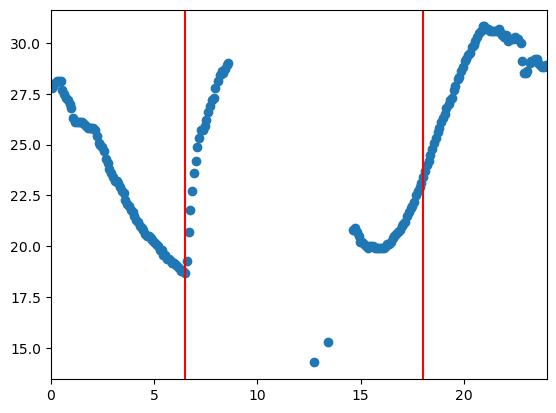

In [19]:
x_data = [float(item.split(' ')[1].split(':')[0]) + float(item.split(' ')[1].split(':')[1])/60 for item in datetime_data]
plt.axis([0, 24, None, None])
plt.scatter(x_data, temp_data)
plt.axvline(x=float(datetime_data[morning_index].split(' ')[1].split(':')[0]) + float(datetime_data[morning_index].split(' ')[1].split(':')[1])/60, color="r")
plt.axvline(x=float(datetime_data[evening_index].split(' ')[1].split(':')[0]) + float(datetime_data[evening_index].split(' ')[1].split(':')[1])/60, color="r")

In [14]:
len(temp_data)

116